# Simple Linear Regression from Scratch

- On considère le dataset `possum.csv` qui rassemble des données sur des opossums.

- Implémentez une **régression linaire** permettant de prédire la variable $Y$ `footlgth`en fonction de la variable $X$ `earconch`.

- On rappelle que le problème de minimisation et la solution associée de la régression linéaire sont donnés par:

\begin{align*}
\hat \beta_0, \hat \beta_1 & = & \underset{\beta_0, \beta_1}{\arg \min}~\mathrm{RSS} ( \beta_0, \beta_1 ) 
= \underset{\beta_0, \beta_1}{\arg \min} \sum_{i=1}^N \big( (\beta_0 + \beta_1 x_i) - y_i \big)^2 \\
\\
\hat \beta_0  = \bar y - \hat \beta_1 \bar x & ~~~~~\text{et}~~~~~ & \hat \beta_1  = \frac{\sum_{i=1}^N x_i (y_i - \bar y)}{\sum_{i=1}^N x_i (x_i - \bar x)} = \frac{\sum_{i=1}^N ( x_i - \bar x)(y_i - \bar y)}{\sum_{i=1}^N (x_i - \bar x)^2} = \frac{S_{xy}}{S_{xx}}  \\
\\
& \text{où} & \bar x = \frac{1}{N}\sum_{i=1}^N x_i ~~~\text{et}~~~ \bar y = \frac{1}{N}\sum_{i=1}^N y_i
\end{align*}

## Librairies

In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Data

In [13]:
dataset = pd.read_csv("data/possum.csv")

In [14]:
dataset

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


## Dataset

In [15]:
X = dataset.earconch.values
Y = dataset.footlgth.values
Y = np.nan_to_num(Y, nan=np.nanmean(Y))

In [16]:
X, Y

(array([54.5, 51.2, 51.9, 52.2, 53.2, 53.6, 52. , 53.9, 52.9, 53.4, 51.3,
        51. , 49.8, 53.7, 51.8, 51.4, 53.2, 55.4, 53.9, 52.4, 52.9, 52.1,
        53.3, 53.5, 51.6, 56.2, 50.8, 53. , 51.8, 50.8, 52.5, 52. , 51.8,
        53.1, 55.5, 52. , 52. , 49.5, 53.4, 51.4, 40.3, 51.2, 49.4, 52.6,
        54. , 51.2, 45.5, 44.9, 45. , 47.2, 43.9, 44.3, 46. , 46. , 44.9,
        46.8, 45.3, 46.4, 44.5, 47. , 44.9, 41.3, 46.3, 45.1, 41.7, 44.2,
        44.1, 43.1, 45.6, 44.1, 42.8, 42.4, 44.7, 45.9, 45.6, 46.4, 42.9,
        44.3, 43. , 44.8, 41.7, 42.9, 43.3, 43.6, 43.5, 43.7, 46.8, 43.5,
        46.2, 44.8, 48. , 46.8, 44.9, 45.1, 45.4, 47.7, 46. , 44.3, 43.8,
        46.8, 48. , 45.4, 45.9, 46. ]),
 array([74.5      , 72.5      , 75.4      , 76.1      , 71.       ,
        73.2      , 71.5      , 72.7      , 72.4      , 70.9      ,
        77.2      , 71.7      , 71.       , 74.3      , 69.7      ,
        73.       , 73.2      , 73.7      , 73.4      , 73.8      ,
        77.9      , 73

## Linear regression (from scratch)

In [17]:
y_bar = np.mean(Y)
x_bar = np.mean(X)

In [18]:
b1 = np.sum((X - x_bar) * (Y - y_bar)) / np.sum((X - x_bar) ** 2)
b0 = y_bar - b1 * x_bar

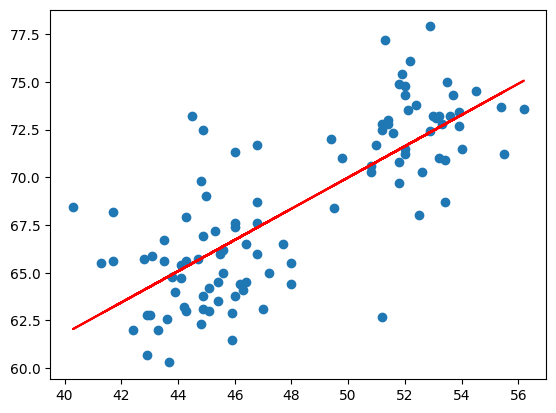

In [19]:
y_hat = b0 + b1 * X

plt.scatter(X, Y)
plt.plot(X, y_hat, color='red')

## Linear regression (scikit-learn)

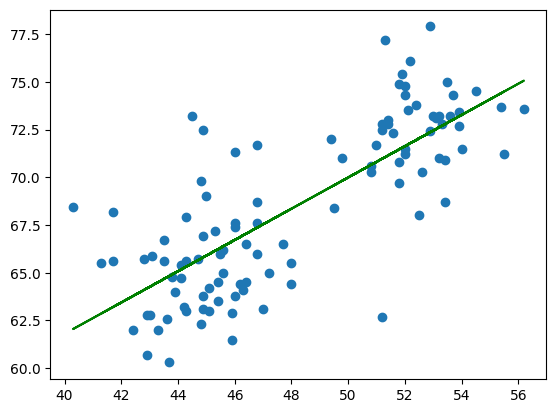

In [21]:
import sklearn.linear_model as lm

X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

model = lm.LinearRegression()

model.fit(X, Y)

y_hat = model.predict(X)

plt.plot(X, y_hat, color='green')
plt.scatter(X, Y)